# Appendix D: Laplace transforms & filters

This notebook discusses laplace transforms and their use in analysing a system's response to an input signal $u(t)$.
In particular, a _filter's_ response to a (co)sinusoidal input.

The text glosses over the tricky maths of using the Dirac delta, but writes out a lot of the easy stuff.
Derivations can be skipped.

## The impulse response

Let $\delta(t)$ be the [unit impulse](https://en.wikipedia.org/wiki/Dirac_delta_function) or Dirac delta, which is commonly thought of as

\begin{align}
\delta(t - t_0) = \begin{cases}
\infty, &t = t_0\\
0, &t \neq t_0\end{cases}
\end{align}

but has a more complicated "proper" definition as a [generalised function](https://en.wikipedia.org/wiki/Generalized_function) with properties:

1. $$\int_a^b \delta(t)dt = 1 \quad\text{if } 0 \in [a, b] $$
2. $$\int_a^b \delta(t)dt = 0 \quad\text{if } 0 \notin [a, b]$$
3. $$\int_{-\infty}^{\infty} \delta(t - t_0)g(t)\,dt = g(t_0)$$

The response to a system driven with $\delta$ is called the [impulse response](https://en.wikipedia.org/wiki/Impulse_response), and will be denoted here as $h(t)$.

Impulse responses for common functions can be looked up in tables, but they can also be worked out by hand.
For example, given a system defined by 

\begin{align}
\dot{y}(t) + ay(t) = u(t)
\end{align}

where $y$ is the state, $u$ is the input and $a$ is a non-zero constant, we can fill in $u(t)=\delta(t)$ and $y(t)=h(t)$ (by h's definition) so that 

\begin{align}
\dot{h}(t) + ah(t) = \delta(t)
\end{align}

Next, we'll assume that the system has no response for $t < 0$ (the impulse hasn't happened yet).
At $t > 0$, we have $\delta(t) = 0$ and so we can separate $\frac{dh}{dt} = -ah$ as usual to find $h(t) = h_0 e^{-at}$.
The situation at $t = 0$ is tricky to analyse, but the accepted solution seems to be that (1) $h(t = 0)$ is undefined, (2) its limit approached from the left is 0, and (3) its limit approached from the right is 1.
Integrating from $0$ to $t$ we then get $h_0 = 1$, so that the full impulse response becomes
\begin{align}
h(t) = \begin{cases}e^{-at}, &t>0,\\0, &t<0\\\text{undefined}, &t=0\end{cases}
\end{align}

More commonly we'll ignore negative time and just write e.g. $h(t)=e^{-at}$.

The integral of the unit impulse is the [unit step](https://en.wikipedia.org/wiki/Heaviside_step_function) function:
\begin{equation}
\theta(t - t_0) = \begin{cases}1, &t > t_0\\0, &t < t_0\\\text{undefined}, &t = t_0\end{cases}
\end{equation}
(some people use a different definition for the $t=t_0$ case).

Using the unit step, we can write the above equation for $h(t)$ as $h(t) = e^{-at}\theta(t)$.

### The superposition principle and linear systems

Next, we introduce the [superposition principle](https://en.wikipedia.org/wiki/Superposition_principle).
This holds if, when input $u_1(t)$ has response $y_1(t)$ and input $u_2(t)$ has response $y_2(t)$, any **linear combination** of the input signals $u(t) = \alpha_1 u_1(t) + \alpha_2 u_2(t)$ results in the same linear combination of responses $y(t) = \alpha_1 y_1(t) + \alpha_2 y_2(t)$.

The class of systems satisfying this priniciple are called [linear systems](https://en.wikipedia.org/wiki/Linear_time-invariant_system).



### Decomposing arbitrary inputs into impulse responses

For systems where the superposition principle holds, we can analyse the response to any input signal $u(t)$ by decomposing into sub-inputs with known responses.
If we're willing to do some maths, this can even be an infinite number of sub-inputs, for example sine waves or unit impulses.

Let $\delta(t - \tau)$ be a unit impulse input, and $h(t - \tau)$ the impulse response, we can then write $u(t)$ as a linear combination with an infinite number of terms $u(\tau)\delta(t - \tau)\,d\tau$ (where $\tau$ is a constant):
\begin{align}
u(t) = \int_{-\infty}^\infty u(\tau)\delta(t - \tau)\,d\tau
\end{align}

writing the same linear combination for the known impulse responses $h(t - \tau)$ we find:

\begin{align}
y(t) = \int_{-\infty}^\infty u(\tau)h(t - \tau)\,d\tau
\end{align}

These horrible forms are known as "convolution integrals", sometimes denoted with a $*$:
\begin{align}
(f * g)(t) = \int_{-\infty}^\infty f(\tau)g(t - \tau)\,d\tau
\end{align}
where the left hand side notation is meant to convey that this is an operation on _functions_: we are convolving the functions themselves, not their evaluations on some specific value of $t$.
Convolution is not restricted to time-varying functions: $t$ represents any free variable.
For people who love properties of things we can add that $(f * g)(t) = (g * t)(t)$.

In summary:

1. The impulse function is a slightly dubious "generalised function" for which $\int_a^b\delta(t)dt=1$ if and only if $0\in[a, b]$.
2. A system's response to being driven with a unit impulse is called its impulse response, and can be derived or looked up in tables.
3. If the system obeys the superposition principle, we can write its response to an arbitrary input signal as a convolution integral of the input and the impulse response.

## The Laplace transform

The Laplace transform is a one-to-one mapping between function spaces: it can be applied to a function "in the time domain" to yield another "in the Laplace domain".
A typical use case is to apply the Laplace transformation, manipulate the function in ways that would have been harder in the time domain, and then transform back.

For a function $f(t)$ on $t \geq 0$, its Laplace transformation $F(s)$ is defined as

\begin{equation}
F(s) = \int_0^\infty f(t) e^{-st} dt
\end{equation}

where $s$ is the new free variable, and is a complex number (so we're mapping 1-d functions onto 2-d functions!).

We denote this transfer as $\mathcal{L}\{f(t)\} = F(s)$.

### The inverse transform?

Being a nice one-to-one mapping, the Laplace transformation should have an inverse.
You can find it on [wikipedia](https://en.wikipedia.org/wiki/Inverse_Laplace_transform), but it's more common to rely on tables when converting back to the time domain, or to end the analysis without ever converting back.

### Some things are easier in the Laplace domain

The Laplace transform has some very nice properties.
For starters, **linear combinations** stay the same:

\begin{align}
& \int_0^\infty \left[a f(t) + b g(t)\right] e^{-st} dt 
    = a \int_0^\infty f(t) e^{-st} dt + b \int_0^\infty g(t) e^{-st} dt 
    = aF(s) + bG(s)
\end{align}

#### Time-derivatives

More surprisingly, time-derivatives become multiplications by powers of $s$.

Starting from
\begin{align}
\int_0^\infty \dot{f}(t) e^{-st} dt
\end{align}

we use integration by parts $\int U dV = UV - \int V dU$ with $U=e^{-st}$ and $dV=\dot{f}(t)dt$ to find

\begin{align}
\int_0^\infty \dot{f}(t) e^{-st} dt
&= \left[f(t)e^{-st}\right]_0^\infty + \int_0^\infty f(t)se^{-st} dt \\
&= 0 - f(0)e^0 + s \int_0^\infty f(t)e^{-st} dt \\
&= s F(s) - f(0)
\end{align}

or

\begin{align}
\mathcal{L}\{\dot{f}(t)\} = s F(s) - f(0)
\end{align}

Similarly, for second order time-derivatives we get $\mathcal{L}\{\ddot{f(t)}\} = s^2F(s) - sf(0) - \dot{f}(0)$.

#### Convolution and impulse response

Most importantly, ugly convolution becomes multiplication.

To prove this, you start by writing out
\begin{align}
\mathcal{L}\{f*g\} = \int_0^\infty \left(\int_0^t f(\tau) g(t-\tau) \,d\tau \right)e^{-st}dt
\end{align}
and then, if you're _really_ good at integrals, you do several tricks and end up with
\begin{align}
=F(s)G(s)
\end{align}

As a result, for a system with input $u$ and impulse response $h(t)$, we can replace
\begin{align}
y(t) = \int_{-\infty}^\infty u(\tau)h(t - \tau)\,d\tau
\end{align}
with
\begin{align}
Y(s) = H(s) U(s)
\end{align}

where $H(s) = Y(s)/U(s)$ is called the system's **transfer function**.

#### More properties

There's a [list on wikipedia](https://en.wikipedia.org/wiki/Laplace_transform#Properties_and_theorems).

### Some transformed functions

There are lots of tables of Laplace transforms out there, including the [Laplace transform wikipedia page](https://en.wikipedia.org/wiki/Laplace_transform).
A few famous ones are given below.

Exponentials:
$$\mathcal{L}\{e^{-at}\} = \frac{1}{s + a}$$

Sine & cosine:
$$\mathcal{L}\{\sin(\omega t)\}
    = \mathcal{L}\left\{\frac{e^{i \omega t} - e^{i \omega t}}{2i}\right\}
    = \frac{\omega}{s^2 + \omega^2}$$

$$\mathcal{L}\{\cos(\omega t)\}
    = \mathcal{L}\left\{\frac{e^{i \omega t} + e^{i \omega t}}{2}\right\}
    = \frac{s}{s^2 + \omega^2}$$

The impulse function:
$$\mathcal{L}\{\delta(t)\} = 1$$

The unit step function:
$$\mathcal{L}\{\alpha \theta(t)\} = \frac{\alpha}{s}$$

## Analysing systems with zeros and poles

Many systems can be analysed in terms of their _zeros_ (values of $s$ for which $H(s)$ is zero) and _poles_ (a [particular type of singularity](https://en.wikipedia.org/wiki/Zeros_and_poles)).

In particular, any n-th order linear differential equation (with all initial conditions set to 0) has a transfer function that can be written as the fraction of two polynomials:

\begin{align}
F(s) = \frac{a_ms^m + a_{m-1}s^{m-1} + ...}{b_ns^n + b_{n-1}s^{n-1} + ...} = k\frac{\prod_{i=1}^m(s - z_i)}{\prod_{i=1}^n(s - p_i)}
\end{align}

where $p_i$ are its **poles** and $z_i$ are its **zeroes**.

Analysis of systems written this form is often simplified using [partial fraction decomposition](https://en.wikipedia.org/wiki/Partial_fraction_decomposition) to write $F$ as a sum instead of a product.

### Real, imaginary, and complex poles

We can tell a lot by looking at the poles.
Like $s$, poles can be complex numbers, and the system's behaviour differs depending on whether they are fully real, fully imaginary, or complex.

#### Real poles result in exponential terms

The form 
\begin{equation}
F(s) = \frac{C_1}{s - p_1} + \frac{C_2}{s - p_2} + ... + \frac{C_n}{s - p_n}
\end{equation}
where $p_i$ are all real numbers has inverse transform 
$$f(t) = \left( C_1e^{p_1t} + C_2e^{p_2t} + ... + C_ne^{p_nt} \right) \theta(t)$$

Terms like $\frac{C_i}{(s - p_i)^2}$ become $C_ite^{p_it}$, while $\frac{C_i}{(s - p_i)^3}$ becomes $C_it^2e^{p_it}$ etc.

#### Imaginary poles give oscillations

The form
\begin{equation}
F(s) = \frac{C_1 + C_2s}{(s - i\omega)(s + i\omega)} = \frac{C_1 + C_2s}{s^2 +\omega^2}
\end{equation}
has inverse
\begin{equation}
f(t) = \left( \frac{1}{\omega} C_1\sin(\omega t) + C_2\cos(\omega t)\right) \theta(t)
\end{equation}

#### Complex poles give growing or damped oscillations

The form
\begin{equation}
F(s) = \frac{C_1 + C_2s}{(s+\sigma-i\omega)(s+\sigma+i\omega)} 
     = \frac{C_1 + C_2s}{(s + \sigma)^2 +\omega^2}
\end{equation}
with poles $-\sigma + i\omega$ and $-\sigma -i\omega$, has inverse
\begin{equation}
f(t) = \left(
    \frac{C_1 - C_2\sigma}{\omega}e^{-\sigma t}\sin(\omega t) + C_2e^{-\sigma t}\cos(\omega t)
\right) \theta(t)
\end{equation}


#### Stability and oscillations

In summary, for a system with poles $p_i = \sigma_i + i \omega$,

- the system is stable only if all real parts are negative $\sigma_i < 0$

and

- a system with fully real poles (all $\omega_i = 0$) exhibits exponential behaviour,
- a system with fully imaginary poles (all $\sigma_i = 0$) exhibits pure oscillations,
- a system with complex poles exhibits damped ($\sigma_i < 0$) or exponentially growing ($\sigma_i > 0$) oscillations.

### Free and forced response
The ODE
\begin{align}
\tau \dot{y} + y(t) = u(t)
\end{align}

has Laplace transform 

\begin{align}
\tau (s Y(s) - y(0)) + Y(s) = U(s)
\end{align}

or

\begin{align}
Y(s) = \frac{\tau y(0)}{\tau s + 1} + \frac{1}{\tau s + 1} U(s)
\end{align}

The first term is called the **free** or **natural response** and represents the system's response to its initial conditions.
The second term is called the **forced response**.

### First and second order systems with zeroed initial conditions

#### A first order system with y(0) = 0

The ODE
\begin{align}
\tau \dot{y} + y(t) = u(t)
\end{align}

with $y(0) = 0$ has transfer function

\begin{align}
H(s) = \frac{1}{1 + s\tau} = \frac{\omega}{\omega + s}
\end{align}

and impulse response

\begin{align}
h(t) = \frac{1}{\tau} e^{-t/\tau}
\end{align}

#### A second order system with real & distinct poles

The ODE

\begin{align}
a \ddot{y} + b \dot{y} + c y(t) = u(t)
\end{align}

with $y(0) = 0$ and $\dot{y}(0) = 0$ has transfer function

\begin{align}
H(s) = \frac{1}{a s^2 + b s + c} = \frac{k}{(s - p_1)(s - p_2)} = \frac{C_1}{s - p_1} + \frac{C_2}{s - p_2}
\end{align}

where the last bit is a [partial fraction decomposition](https://en.wikipedia.org/wiki/Partial_fraction_decomposition).
As a result, it has impulse function

\begin{align}
h(t) = C_1 e^{p_1 t} + C_2 e^{p_2 t}
\end{align}

#### A second order system with imaginary poles

The ODE
\begin{align}
\ddot{y} + 2\zeta\omega\dot{y} + \omega^2 = u(t)
\end{align}

with $y(0) = 0$, $\dot{y}(0) = 0$, and $\ddot{y}(0) = 0$, has transfer function

\begin{align}
H(s) = \frac{1}{s^2 + 2\zeta\omega s + \omega^2}
\end{align}

we can find the poles by solving $s^2 + 2\zeta\omega s + \omega^2 = 0$ to find
\begin{align}
-\zeta \omega \pm \omega \sqrt{\zeta^2 - 1}
\end{align}

If we consider the case where $\zeta > 1$, then the poles are real and we have the system above.
For $\zeta = 1$ we get a slightly different transfer function $\frac{C_1s + C_2}{(s + \omega)^2}$.
But for $0 \leq \zeta < 1$ the poles must be imaginary.
We can make this explicit by multiplying the term inside the square root by $-1$ and writing the poles as

\begin{align}
-\zeta \omega \pm i \omega \sqrt{1 - \zeta^2}
\end{align}
for
\begin{align}
H(s) = \frac{1}{(s + \zeta \omega + i \omega \sqrt{1 - \zeta^2})(s + \zeta \omega - i \omega \sqrt{1 - \zeta^2})}
     = \frac{1}{(s + \zeta \omega)^2 + \omega^2 (1 - \zeta^2)}
\end{align}

Using the equation given above under "poles and zeros", we see that the impuls response is

\begin{align}
f(t) = \frac{1}{\omega \sqrt{1 - \zeta^2}}e^{-\zeta\omega t}\sin\left(\omega \sqrt{1 - \zeta^2} t\right) \theta(t)
     = \frac{1}{\omega_d}e^{-\zeta\omega t}\sin\left(\omega_d t\right) \theta(t) 
\end{align}

where $\zeta$ is the _damping coefficient_, $\omega$ is the _natural frequency_, and $\omega_d = \omega\sqrt{1 - \zeta^2}$ is the _damped frequency_.

## Frequency response example: a low-pass filter

In engineering (unlike in cell electrophysiology) the most interesting part of a system is often how it responds to a (co)sinusoidal input.

We can obtain this by filling in the laplace transform of a sine or cosine for U(s), carrying out the multiplication with H(s), and then working out the inverse transform.
We'll do this below for illustrative purposes, but skip to the next section to see why people usually don't.

### Deriving a transfer function

The example we use is a [low-pass filter](https://en.wikipedia.org/wiki/Low-pass_filter), for example the schematic below:

<img src="resources/rc-1-simple.png" />

Using Kirchoff's laws we write a differential equation for $V$ in terms of $V_\text{in}$

\begin{align}
\left.
\begin{aligned}
&V - V_\text{in} = I_R R \\
&I_R = I_C = C\frac{d}{dt}(0 - V) = -C\dot{V} \\
\end{aligned}
\right\}V - V_\text{in} = -RC\dot{V}
\end{align}

Using $\omega = 1/RC$

\begin{align}
\dot{V}(t) = \omega\left(V_\text{in}(t) - V(t)\right)
\end{align}

Apply a Laplace transformation, with initial conditions $V(0)=0$:

\begin{align}
s V(s) &= \omega(V_\text{in}(s) - V(s)) \\
V &= V_\text{in} \omega / (s + \omega)
\end{align}

Then find the transfer function by dividing by $U(s) = V_\text{in}(s)$ for

\begin{align}
H(s) &= \frac{\omega}{s + \omega}
\end{align}



### Finding the output

To see why this is called a "low-pass filter", we apply the input

\begin{align}
u(t) = \cos(\phi t)
    \quad\longrightarrow\quad
U(s) = \frac{s}{s^2 + \phi^2}
\end{align}
to get
\begin{align}
Y(s) = H(s)U(s) = \frac{\omega s}{(s + \omega)(s^2 + \phi^2)}
\end{align}

Partial fraction decomposition lets us write this as 
\begin{align}
Y(s) = \frac{A}{s + \omega} + \frac{B s + C}{s^2 + \phi^2}
\end{align}

which we can bring under a common denominator and expand to

\begin{align}
Y(s) = \frac{s^2(A + B) + s(B\omega + C) + (A\phi^2 + C\omega)}{(s + \omega)(s^2 + \phi^2)}
\end{align}

which holds if $B = -A$ and $C = -\frac{\phi^2}{\omega}A$.
For $A$ itself we find
\begin{align}
\omega = B\omega + C = -A\omega - \frac{\phi^2}{\omega}A
    \,\longrightarrow\,
A = \frac{\omega}{-\omega - \phi^2/\omega} = \frac{-\omega^2}{\omega^2 + \phi^2}
\end{align}

Filling in expressions for $B$ and $C$ we arrive at

\begin{align}
Y(s) = A\frac{1}{s + \omega} -A\frac{s}{s^2 + \phi^2} - A\frac{\phi}{\omega}\frac{\phi}{s^2 + \phi^2}
\end{align}

which translates back easily to

\begin{align}
y(t) = Ae^{-\omega t} -A\left[\cos(\phi t) + \frac{\phi}{\omega}\sin(\phi t)\right]
\end{align}

This shows us that the response can be broken up into two parts: a **transient response**, depending only on (A and) the filter frequency $\omega$, and a **periodic response**, with the frequency of the input signal, $\phi$.

#### Intermezzo: the harmonic addition theorem

To simplify further we need something known as the "harmonic addition theorem", which shows that we can write the grouped terms above as a single cosine with a phase shift:
$$a\cos(x) + b\sin(x) = c\cos(x + z)$$

to see that this is true and find the appropriate $c$ and $z$ we write

\begin{align}
a\cos(x) + b\sin(x) &= c\cos(x + z) \\
                    &= c\cos(x)\cos(z) - c\sin(x)\sin(z)
\end{align}
so that
\begin{align}
\left.\begin{aligned} a &= c\cos(z) \\ b &= -c\sin(z) \end{aligned}\right\}
\quad \tan{z}=\frac{\sin(y)}{\cos(z)}=\frac{-b}{a}
\quad \longrightarrow \quad z = \arctan(-b/a)
\end{align}
and
$$a^2 + b^2 = c^2\cos^2(z) + c^2\sin^2(z) = c^2 \quad \longrightarrow \quad c = \pm \sqrt{a^2 + b^2}$$

##### Form using sign(a)

Finally, because $\arctan$ by definition returns a value $z \in (-\pi/2, \pi/2)$ we have $\cos(z) \geq 0$ and so $a$ and $c$ must have the same sign, denoted $\operatorname{sign}(a)$.
This gives us the final result:

\begin{align}
a\cos(x) + b\sin(x) = \operatorname{sign}(a)\sqrt{a^2+b^2} \cos(x + \arctan(-b/a))
\end{align}

##### Atan2 form

Alternatively, we can use [atan2(b, a)](https://en.wikipedia.org/wiki/Atan2).
This differs from $\arctan(b/a)$ by either $+\pi$ or $-\pi$ whenever $a < 0$, and since $\cos(x \pm \pi) = -\cos(x)$  this means the $\cos$ will have the same sign as $a$ so that we can write:

\begin{align}
a\cos(x) + b\sin(x) = \sqrt{a^2+b^2} \cos(x + \operatorname{atan2}(-b, a))
\end{align}

#### Back to the low-pass filter!

Filling in $a = 1$ and $b = \phi / \omega$ we get
\begin{align}\cos(\phi t) + \frac{\phi}{\omega}\sin(\phi t) 
    &= \operatorname{sign}(1)\sqrt{1 + \phi^2/\omega^2} \cos\left(\phi t + \arctan(-\phi / \omega)\right) \\
    &= \sqrt{1 + \phi^2/\omega^2} \cos\left(\phi t - \arctan(\phi / \omega)\right)
\end{align}

The complete response becomes

\begin{align}
y(t) &= \frac{-\omega^2}{\omega^2 + \phi^2} e^{-\omega t} - \frac{-\omega^2}{\omega^2 + \phi^2} \sqrt{1 + \phi^2/\omega^2} \cos\left(\phi t - \arctan(\phi / \omega)\right) \\
    &= -\frac{\omega^2}{\omega^2 + \phi^2} e^{-\omega t} + \frac{\omega}{\sqrt{\omega^2 + \phi^2}} \cos\left(\phi t - \arctan(\phi / \omega)\right) \\
\end{align}

This clearly shows the **transient part** on the left, and the **periodic part** on the right, which has **the same frequency** as the input signal but a **phase shift** depending on the ratio of the input frequency to the filter frequency.
Both terms have an amplification or gain factor depending on both frequencies.

#### Interpreting the result

We applied an input $\cos(\phi t)$ and got a response consisting of an exponentially decaying term and an oscillation.
To analyse this further, let $\lambda = \phi / \omega$ be the ratio between the input and the filter frequencies, so that $\lambda > 1$ means the input frequency exceeds the filter frequency.
The equation above then simplifies to
\begin{align}
y(t) = -\frac{1}{1 + \lambda^2} e^{-\omega t} 
     + \frac{1}{\sqrt{1 + \lambda^2}} \cos\left(\phi t - \arctan(\lambda) \right)
\end{align}

This means that, once the transient response has died out, the main effect of the filter is to apply a phase shift and a frequency-dependent scaling $(1 + \lambda^2)^{-1/2}$.
We can plot this response on a linear scale or, as is more commonly done, on a log-log scale:

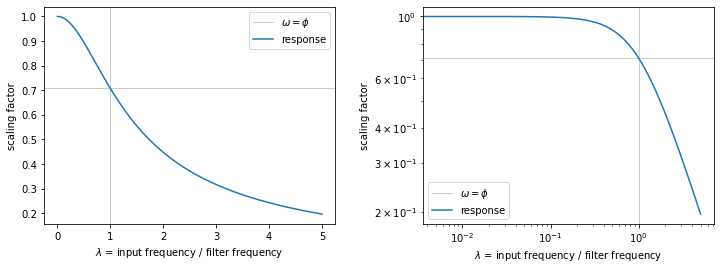

In [1]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: 1 / np.sqrt(1 + x**2)

x = np.linspace(0, 5, 1001)
y = f(x)

fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(wspace=0.3)

ax = plt.subplot(1, 2, 1)
ax.set_xlabel('$\lambda$ = input frequency / filter frequency')
ax.set_ylabel('scaling factor')
ax.axvline(1, color='#999', lw=0.5, label='$\omega = \phi$')
ax.axhline(f(1), color='#999', lw=0.5)
ax.plot(x, y, label='response')
ax.legend()

ax = plt.subplot(1, 2, 2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$ = input frequency / filter frequency')
ax.set_ylabel('scaling factor')
ax.axvline(1, color='#999', lw=0.5, label='$\omega = \phi$')
ax.axhline(f(1), color='#999', lw=0.5)
ax.plot(x, y, label='response')
ax.legend()

plt.show()

Looking at the linear plot, we can clearly see that the filter has a strong effect on frequencies above $\omega$, but already provides significant damping even at $\phi = \omega$.
In the log-log plot the effect seems a bit more dramatic: for $\phi \approx 10^{-1} \omega$ there is very little filtering, but anything higher gets filtered out.

This finally shows us why it's called a "low-pass" filter: only low frequencies (relative to $\omega$) pass through unattenuated.

When combined with a plot of the phase shift, the log-log plot above is called a [Bode plot](https://en.wikipedia.org/wiki/Bode_plot).
In many engineering applications the transient response is uninteresting (provided it can be made short), so people usually don't bother with all the above to figure it out.
Instead, they look only at the _frequency response_.

### Corner frequency and bandwidth

At $\phi = \omega$, the filter reduces the signal by a factor $1 / \sqrt{1 + \lambda^2} = 1 / \sqrt{2}$.
Because the _power_ of this signal is proportional to its square, $1/2$, and because $^{10}\log(1/2) \approx -3.01$ this is also known as the "3[dB](https://en.wikipedia.org/wiki/Decibel) point".

In [2]:
amplitude = 1 / np.sqrt(2)  # The amplitude at phi=omega is 1/sqrt(2)
power = amplitude**2        # The power is proportional to amplitude**2
10*np.log10(1/2)            # Engineers like decibels

-3.010299956639812

In general, any frequency at which a filter's gain drops to $\sqrt{1/2}$ is known as a _cutoff_ or [_corner frequency_](https://en.wikipedia.org/wiki/Cutoff_frequency).

The width of the range of frequencies with a gain above $\sqrt{1/2}$ is called the [bandwidth](https://en.wikipedia.org/wiki/Bandwidth_(signal_processing)).
For the low-pass filter above, both the cutoff frequency and the bandwidth have the value $\omega$.

### Equations for cos and sin

In summary, for the low-pass filter and a cosine input we found

\begin{align}
y(t) &= -\frac{\omega^2}{\omega^2 + \phi^2} e^{-\omega t} + \frac{\omega}{\sqrt{\omega^2 + \phi^2}} \cos\left(\phi t - \arctan(\phi / \omega)\right) \\
    &= -\frac{1}{1 + \lambda^2} e^{-\omega t} + \frac{1}{\sqrt{1 + \lambda^2}} \cos\left(\phi t - \arctan(\lambda) \right)
\end{align}

where $\lambda = \phi / \omega$.

We can repeat with a $\sin$ input to find

\begin{align}
y(t) &= \frac{\omega\phi}{\omega^2 + \phi^2} e^{-\omega t} 
     + \frac{\omega}{\sqrt{\omega^2 + \phi^2}} \sin\left(\phi t - \arctan(\phi/\omega)\right) \\
     &= \frac{\lambda}{1 + \lambda^2} e^{-\omega t} 
     + \frac{1}{\sqrt{1 + \lambda^2}} \sin\left(\phi t - \arctan(\lambda)\right)
\end{align}

### Let's simulate

We now use Myokit to simulate three cases: $\lambda = 1/2$, $\lambda = 1$, and $\lambda = 2$.

First we define a model for the cosine case:

In [3]:
import myokit

cos_model = myokit.parse_model('''
[[model]]
rc.v0 = 0
rc.v1 = 0
rc.v2 = 0
input(time, omega, lambda) = cos(lambda * omega * time)

[rc]
t = 0 bind time
omega = 2
cos0 = input(t, omega, 1 / 2)
cos1 = input(t, omega, 1)
cos2 = input(t, omega, 2)
dot(v0) = (cos0 - v0) * omega
dot(v1) = (cos1 - v1) * omega
dot(v2) = (cos2 - v2) * omega
''')

Next, we'll run a simulation and plot the results:

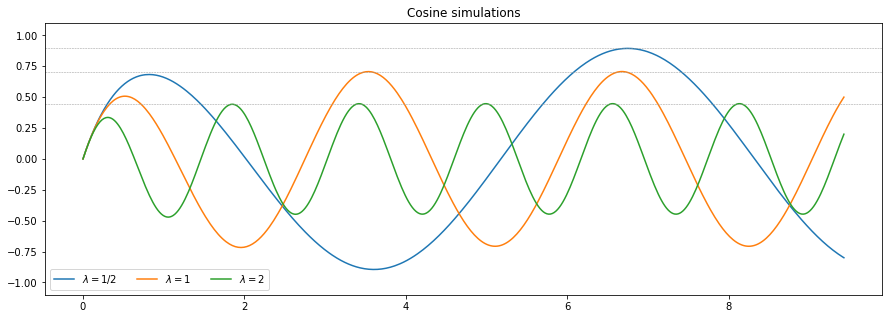

In [4]:
sim = myokit.Simulation(cos_model)
sim.set_tolerance(1e-8, 1e-8)
log = sim.run(np.pi * 3).npview()
t = log.time()

def amplitude(x):
    """Expected amplitude"""
    return 1 / np.sqrt(1 + x**2)

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Cosine simulations')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, log['rc.v0'], label='$\lambda = 1/2$')
ax.plot(t, log['rc.v1'], label='$\lambda = 1$')
ax.plot(t, log['rc.v2'], label='$\lambda = 2$')
kw = dict(color='#999', lw=0.5, ls='--')
ax.axhline(amplitude(1/2), **kw)
ax.axhline(amplitude(1), **kw)
ax.axhline(amplitude(2), **kw)
ax.legend(ncols=3)

plt.show()

This shows the simulated voltages all starting at $V(t=0) = 0$, but then quickly adapting to become proper cosines.
Each signal is attenuated during the first period, but by the second period we see the peaks reach the expected amplitude for a pure signal.


To check if our maths was any good, we can define functions using the derived equations for the transient and periodic terms, and compare them to the simulations:

In [5]:
omega = cos_model.get('rc.omega').eval()

def cos_transient(t, x):
    """Transient, using x=lambda."""
    return -1 / (1 + x**2) * np.exp(-omega * t)

def cos_periodic(t, x):
    """Sine wave with gain and phase shift."""
    return 1 / np.sqrt(1 + x**2) * np.cos(omega * x * t - np.arctan(x))

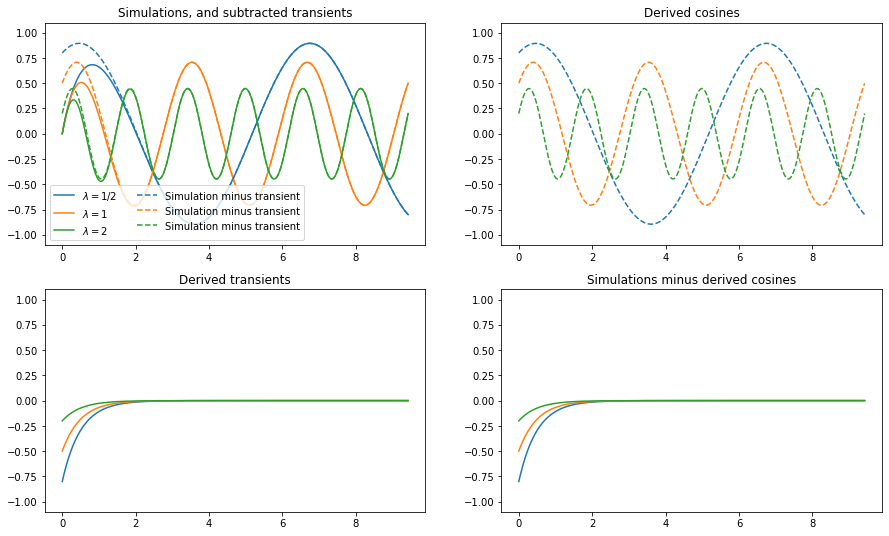

In [6]:
fig = plt.figure(figsize=(15, 9))

ax = fig.add_subplot(2, 2, 1)
ax.set_title('Simulations, and subtracted transients')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, log['rc.v0'], label='$\lambda = 1/2$')
ax.plot(t, log['rc.v1'], label='$\lambda = 1$')
ax.plot(t, log['rc.v2'], label='$\lambda = 2$')
ax.plot(t, log['rc.v0'] - cos_transient(t, 1/2), '--', color='tab:blue', label='Simulation minus transient')
ax.plot(t, log['rc.v1'] - cos_transient(t, 1), '--', color='tab:orange', label='Simulation minus transient')
ax.plot(t, log['rc.v2'] - cos_transient(t, 2), '--', color='tab:green', label='Simulation minus transient')
ax.legend(ncols=2)

ax = fig.add_subplot(2, 2, 2)
ax.set_title('Derived cosines')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, cos_periodic(t, 0.5), '--', color='tab:blue') 
ax.plot(t, cos_periodic(t, 1), '--', color='tab:orange')
ax.plot(t, cos_periodic(t, 2), '--', color='tab:green')

ax = fig.add_subplot(2, 2, 3)
ax.set_title('Derived transients')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, cos_transient(t, 0.5))
ax.plot(t, cos_transient(t, 1))
ax.plot(t, cos_transient(t, 2))

ax = fig.add_subplot(2, 2, 4)
ax.set_title('Simulations minus derived cosines')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, log['rc.v0'] - cos_periodic(t, 0.5))
ax.plot(t, log['rc.v1'] - cos_periodic(t, 1))
ax.plot(t, log['rc.v2'] - cos_periodic(t, 2))

plt.show()

We can repeat the exercise for the sine wave equations:

In [7]:
sin_model = myokit.parse_model('''
[[model]]
rc.v0 = 0
rc.v1 = 0
rc.v2 = 0
input(time, omega, lambda) = sin(lambda * omega * time)

[rc]
t = 0 bind time
omega = 2
sin0 = input(t, omega, 1 / 2)
sin1 = input(t, omega, 1)
sin2 = input(t, omega, 2)
dot(v0) = (sin0 - v0) * omega
dot(v1) = (sin1 - v1) * omega
dot(v2) = (sin2 - v2) * omega
''')

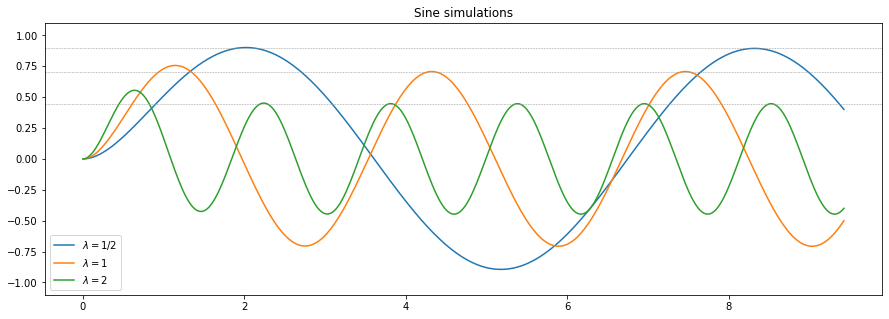

In [8]:
sim = myokit.Simulation(sin_model)
sim.set_tolerance(1e-8, 1e-8)
log = sim.run(np.pi * 3).npview()
t = log.time()

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Sine simulations')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, log['rc.v0'], label='$\lambda = 1/2$')
ax.plot(t, log['rc.v1'], label='$\lambda = 1$')
ax.plot(t, log['rc.v2'], label='$\lambda = 2$')
kw = dict(color='#999', lw=0.5, ls='--')
ax.axhline(amplitude(1/2), **kw)
ax.axhline(amplitude(1), **kw)
ax.axhline(amplitude(2), **kw)
ax.legend()

plt.show()

Consistent with the positive transient term, the signals now all start off with high amplitudes before settling down to the expected filtering level.

Next, we perform the same checks as before:

In [9]:
omega = sin_model.get('rc.omega').eval()

def sin_transient(t, x):
    """Transient, using x=lambda."""
    return x / (1 + x**2) * np.exp(-omega * t)

def sin_periodic(t, x):
    """Sine wave with gain and phase shift."""
    return 1 / np.sqrt(1 + x**2) * np.sin(omega * x * t - np.arctan(x))

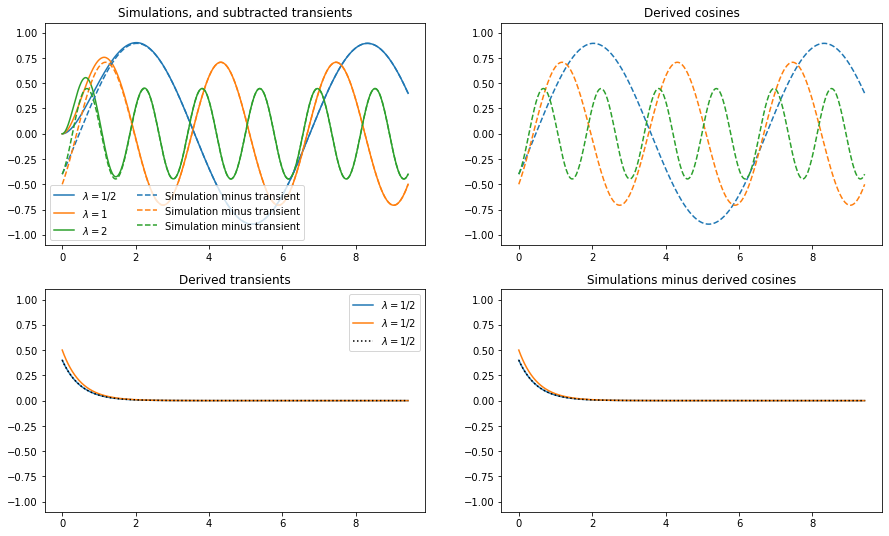

In [10]:
fig = plt.figure(figsize=(15, 9))

ax = fig.add_subplot(2, 2, 1)
ax.set_title('Simulations, and subtracted transients')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, log['rc.v0'], label='$\lambda = 1/2$')
ax.plot(t, log['rc.v1'], label='$\lambda = 1$')
ax.plot(t, log['rc.v2'], label='$\lambda = 2$')
ax.plot(t, log['rc.v0'] - sin_transient(t, 1/2), '--', color='tab:blue', label='Simulation minus transient')
ax.plot(t, log['rc.v1'] - sin_transient(t, 1), '--', color='tab:orange', label='Simulation minus transient')
ax.plot(t, log['rc.v2'] - sin_transient(t, 2), '--', color='tab:green', label='Simulation minus transient')
ax.legend(ncols=2)

ax = fig.add_subplot(2, 2, 2)
ax.set_title('Derived cosines')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, sin_periodic(t, 0.5), '--', color='tab:blue') 
ax.plot(t, sin_periodic(t, 1), '--', color='tab:orange')
ax.plot(t, sin_periodic(t, 2), '--', color='tab:green')

ax = fig.add_subplot(2, 2, 3)
ax.set_title('Derived transients')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, sin_transient(t, 0.5), label='$\lambda=1/2$')
ax.plot(t, sin_transient(t, 1), label='$\lambda=1/2$')
ax.plot(t, sin_transient(t, 2), 'k:', label='$\lambda=1/2$')
ax.legend()

ax = fig.add_subplot(2, 2, 4)
ax.set_title('Simulations minus derived cosines')
ax.set_ylim(-1.1, 1.1)
ax.plot(t, log['rc.v0'] - sin_periodic(t, 0.5))
ax.plot(t, log['rc.v1'] - sin_periodic(t, 1))
ax.plot(t, log['rc.v2'] - sin_periodic(t, 2), 'k:')

plt.show()

## General frequency response

To see how the above examples generalise, we start with an impulse response $h(t)$ **for a stable system** and a cosine input

$$u(t) = \cos(\omega t)$$
to get output
$$y(t) = \int_0^t h(\tau)\cos(\omega(t - \tau))d\tau$$
which we can write as
$$y(t) = \int_0^\infty h(\tau)\cos(\omega(t - \tau))d\tau - \int_t^\infty h(\tau)\cos(\omega(t - \tau))d\tau$$

This seems like a crazy thing to do, but recall that this is an equation _for a single value_ $y$ of $t$.
Because the system is _stable_, its impulse response $h(t)$ will dampen out for increasing values of $t$.
As a result, the multiplication by $h(\tau)$ will cause **the second term to get very small for large values of the starting point of the integral, $t$**:

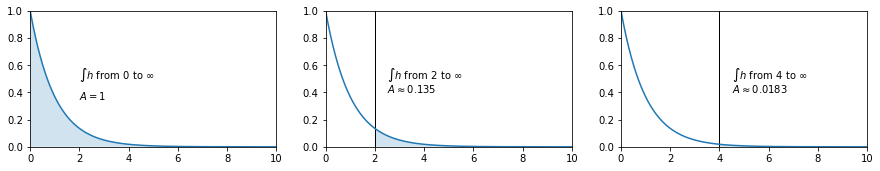

In [11]:
fig = plt.figure(figsize=(15, 2.5))

f = lambda x: np.exp(-x)
x = np.linspace(0, 10, 1001)
y = f(x)

ax = fig.add_subplot(1, 3, 1)
ax.set_xlim(0, 10); ax.set_ylim(0, 1)
ax.plot(x, y)
ax.fill_between(x, y, alpha=0.2)
ax.text(2, 0.5, '$\int h$ from 0 to $\infty$')
ax.text(2, 0.35, '$A=1$')

ax = fig.add_subplot(1, 3, 2)
ax.set_xlim(0, 10); ax.set_ylim(0, 1)
ax.axvline(x[200], color='k', lw=1)
ax.plot(x, y)
ax.fill_between(x[200:], y[200:], alpha=0.2)
ax.text(2.5, 0.5, '$\int h$ from 2 to $\infty$')
ax.text(2.5, 0.4, f'$A\\approx{np.exp(-2):.3}$')

ax = fig.add_subplot(1, 3, 3)
ax.set_xlim(0, 10); ax.set_ylim(0, 1)
ax.axvline(x[400], color='k', lw=1)
ax.plot(x, y)
ax.fill_between(x[400:], y[400:], alpha=0.2)
ax.text(4.5, 0.5, '$\int h$ from 4 to $\infty$')
ax.text(4.5, 0.4, f'$A \\approx{np.exp(-4):.3}$')

plt.show()

By contrast, the integral in the first term
$$y_{ss}(t) = \int_0^\infty h(\tau)\cos(\omega(t - \tau))d\tau$$
is always taken from 0 to $\infty$, so over the full range of $h$, capturing its full "weight" of 1.

This splits the system into a **periodic steady-state response** (first term) and a **transient response** (second term).

Assuming that we're only interested in the periodic steady-state response, $y_{ss}$, we can then analyse the system by looking at $y_{ss}$ exclusively:

\begin{align}
y_{ss}(t)
    &= \int_0^\infty h(\tau)\cos(\omega(t - \tau))d\tau \\
    &= \frac{1}{2} \int_0^\infty h(\tau)\left(e^{i\omega(t - \tau)} + e^{-i\omega(t - \tau)}\right)d\tau \\
    &= \frac{1}{2} e^{i\omega t} \int_0^\infty h(\tau)e^{-i\omega\tau} d\tau +
       \frac{1}{2} e^{-i\omega t} \int_0^\infty h(\tau)e^{i\omega\tau} d\tau \\
    &= \frac{1}{2} e^{i\omega t} H(i\omega) + \frac{1}{2} e^{-i\omega t} H(-i\omega) \\
\end{align}

where we have isolated $H(i\omega)$ and $H(-i\omega)$: two _evaluations_ of the transfer function!

To go further, we first need to show that $H(-i\omega)$ and $H(i\omega)$ are each other's complex conjugates, i.e. $\overline{H(-i\omega)}=H(i\omega)$.
We can do this simply by writing them out:

\begin{align}
H(-i\omega) = \int_0^\infty h(t)e^{i\omega t}dt
            = \int_0^\infty h(t)\cos(\omega t)dt + i \int_0^\infty h(t)\sin(\omega t)dt
\end{align}

Here the first and second terms are the real and imaginary parts of $H(-i\omega)$ (because $h$ and $\cos$ and $\sin$ all return real values).
We do the same for $H(i\omega)$:

\begin{align}
H(i\omega) &= \int_0^\infty h(t)e^{-i\omega t}dt \\
           &= \int_0^\infty h(t)\cos(-\omega t)dt + i \int_0^\infty h(t)\sin(-\omega t)dt \\
           &= \int_0^\infty h(t)\cos(\omega t)dt - i \int_0^\infty h(t)\sin(\omega t)dt \\
           &= \overline{H(-i\omega)} &
\end{align}

Now, using $R=\operatorname{Re}(H(i\omega))$ and $I=\operatorname{Im}(H(i\omega))$ we can write

\begin{align}
y_{ss}(t)
    &= \frac{1}{2} \left[ e^{i\omega t} H(i\omega) + e^{-i\omega t} H(-i\omega) \right] \\
    &= \frac{1}{2} \left[ e^{i\omega t} H(i\omega) + e^{-i\omega t} \overline{H(i\omega)} \right] \\
    &= \frac{1}{2} \left[ e^{i\omega t} R + i e^{i\omega t} I + e^{-i\omega t} R - i e^{-i\omega t} I \right] \\
    &= \frac{1}{2} \left[ (e^{i\omega t} + e^{-i\omega t}) R + i (e^{i\omega t} - i e^{-i\omega t}) I \right] \\
    &= R\cos(\omega t) - I\sin(\omega t) \\
\end{align}

Finally, using the harmonic addition theorem in atan2 form (see above), we get

\begin{align}
y_{ss}(t) = |H(i\omega)| \cos(\omega t + \angle H(i\omega))
\end{align}

where $|H(iw)| = \sqrt{R^2 + I^2}$ and $\angle H(i\omega) = \operatorname{atan2}(I, R)$.

This shows that we can write a **stable** system's _periodic steady state response_ to a cosine input with frequency $\omega$ in terms of the transfer function evaluated at $H(i\omega)$.
If we allow $\omega$ to vary, the resulting function $H(i\omega)$ is called the system's _frequency response_.

Repeating the steps above with a sine input, we find

\begin{align}
y_{ss,cos}(t) = |H(i\omega)| \cos(\omega t + \angle H(i\omega)) \\
y_{ss,sin}(t) = |H(i\omega)| \sin(\omega t + \angle H(i\omega))
\end{align}

### The low-pass filter again

We now apply this general procedure to the low-pass filter we analysed before.
Because we used $\omega$ for its filter frequency, we'll use $\phi$ for the input frequency and $H(i\phi)$ for the frequency response.

\begin{align}
H(s) &= \frac{\omega}{s + \omega} \\
H(i\phi) &= \frac{\omega}{\omega+i\phi}
         = \frac{\omega(\omega-i\phi)}{(\omega+i\phi)(\omega-i\phi)}
         = \frac{\omega^2 - i\omega\phi}{\omega^2 + \phi^2}
\end{align}

\begin{align}
|H(i\phi)| = \frac{|\omega|}{|\omega+i\phi|}
           = \frac{\omega}{\sqrt{\omega^2 + \phi^2}}
\end{align}

\begin{align}
\angle H(i\phi) = \arctan(-\omega\phi / \omega^2) 
                = \arctan(-\phi / \omega)
                = -\arctan(\phi / \omega)
\end{align}

And so
\begin{align}
y_{ss,\cos} &= \frac{\omega}{\sqrt{\omega^2 + \phi^2}} \cos\left(\phi t - \arctan(\phi/\omega)\right) \\
y_{ss,\sin} &= \frac{\omega}{\sqrt{\omega^2 + \phi^2}} \sin\left(\phi t - \arctan(\phi/\omega)\right)
\end{align}

## More filters!

A general strategy to analyse filters is to look at $H(i\omega)$, work out $|H(i\omega)|$ and $\angle H(i\omega)$, and then make a Bode plot.

### A first-order low-pass filter, one last time

In [12]:
def bode(mag, arg, axes=None, lo=1e-2, hi=1e5, **kwargs):
    lo, hi = np.log10(lo), np.log10(hi)
    w = np.logspace(lo, hi, 1001, base=np.e)

    if axes is None:
        fig = plt.figure(figsize=(9, 6))
        fig.subplots_adjust(hspace=0.2)
        ax0 = fig.add_subplot(2, 1, 1)
        ax0.set_xscale('log')
        ax0.set_yscale('log')
        ax0.set_ylabel('Gain')
        ax0.grid()

        ax1 = fig.add_subplot(2, 1, 2)
        ax1.set_xscale('log')
        ax1.set_xlabel('Angular frequency')
        ax1.set_ylabel('Phase shift (degrees)')
        ax1.grid()
    else:
        ax0, ax1 = axes

    label=None
    if kwargs:
        label=','.join(f'{k}={v}' for k, v in kwargs.items())

    ax0.plot(w, mag(w, **kwargs), label=None)
    ax1.plot(w, arg(w, **kwargs) * 180 / np.pi, label=label)
    if label is not None:
        ax1.legend()
       
    return ax0, ax1

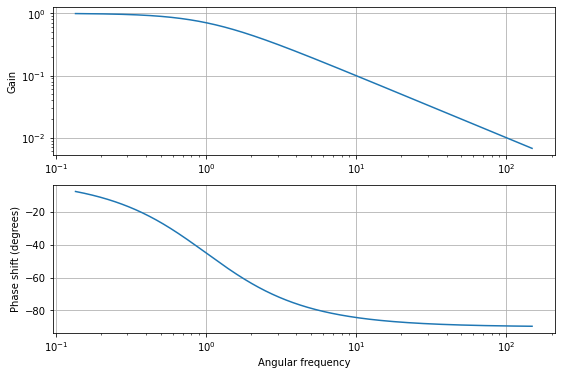

In [13]:
w_filter = 1
mag = lambda w: w_filter / np.sqrt(w_filter**2 + w**2)
arg = lambda w: np.arctan(-w / w_filter)
bode(mag, arg)
plt.show()

### A first-order high-pass filter

We'll use
\begin{align}
H(s) = \frac{s}{s + \omega}
\end{align}
so that
\begin{align}
H(i\phi) &= \frac{i\phi}{\omega+i\phi} = \frac{\phi^2 + i\omega\phi}{\omega^2-\phi^2} \\
|H(i\phi)| &= \frac{|i\phi|}{|\omega+i\phi|} = \frac{\phi}{\sqrt{\omega^2+\phi^2}} \\
\angle H(i\phi) &= \arctan(\omega / \phi)
\end{align}

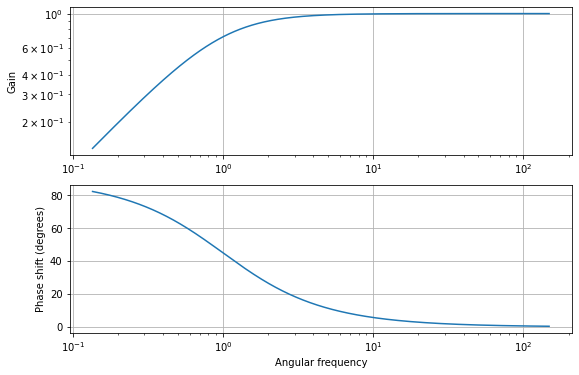

In [14]:
w_filter = 1
mag = lambda w: w / np.sqrt(w_filter**2 + w**2)
arg = lambda w: np.arctan(w_filter / w)
bode(mag, arg)
plt.show()

### A second-order system as a filter

Starting from
\begin{align}
H(s) = \frac{1}{s^2 + 2 \zeta \omega s + \omega^2}
\end{align}
(see above) we can derive
\begin{align}
|H(i\phi)| &= \frac{1}{\sqrt{(\omega^2 - \phi^2)^2 + (2\zeta\omega\phi)^2}} \\
\angle H(i\phi) &= \operatorname{atan2} \left(2\zeta\omega\phi, \omega^2 + \phi^2 \right)
\end{align}

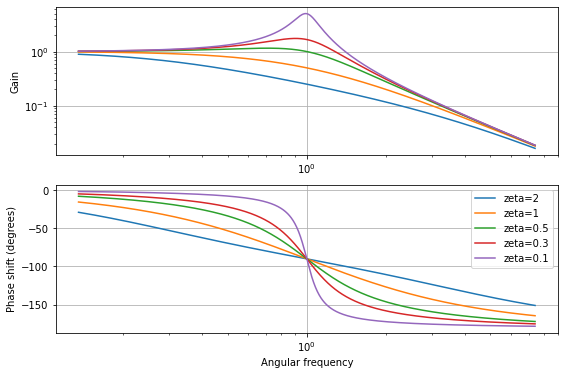

In [15]:
w_filter = 1
mag = lambda w, zeta: 1 / np.sqrt((w_filter**2 - w**2)**2 + (2*zeta*w_filter*w)**2)
arg = lambda w, zeta: np.arctan2(-2*zeta*w*w_filter, w_filter**2 - w**2)
w_hi = 100
axes = bode(mag, arg, hi=w_hi, zeta=2)
axes = bode(mag, arg, axes, hi=w_hi, zeta=1)
axes = bode(mag, arg, axes, hi=w_hi, zeta=0.5)
axes = bode(mag, arg, axes, hi=w_hi, zeta=0.3)
axes = bode(mag, arg, axes, hi=w_hi, zeta=0.1)
plt.show()

### Three-pole Bessel low-pass filter

A [Bessel filter](https://en.wikipedia.org/wiki/Bessel_filter) is a filter with a transfer function that has a [reverse Bessel polynomial](https://en.wikipedia.org/wiki/Bessel_polynomials) in its denominator.
The numerator is a scaling term which is usually set to achieve unity gain for $s = 0$.

For example, a three-pole Bessel low-pass filter is given as:

\begin{align}
H(s) = \frac{15}{s^3 + 6s^2 + 15s + 15}
\end{align}

"Reverse Bessel polynomials" are defined as

\begin{align}
\sum_{k=0}^{n} \frac{(n + k)!}{(n - k)!k!}\frac{x^{n-k}}{2^k}
\end{align}

so it's a good thing we invented computers.

In [16]:
def revbes(n):
    """ Returns the coefficients for a reverse Bessel polynomial. """
    f = np.math.factorial
    return [int(f(n + k) / (f(n - k) * f(k) * 2**k))
            for k in range(n + 1)]
    
print(revbes(3))

[1, 6, 15, 15]


Alternatively, they are defined as having poles spaced equally on the left-part of a circle, with half-spacing before the first and after the last point.

For three poles, this works out as:

\begin{align}
x_0, y_0 &= \sqrt{5}/3, \, 2/3 \\
x_1, y_1 &= 1, \, 0 \\
x_2, y_2 &= \sqrt{5}/3, \, -2/3
\end{align}

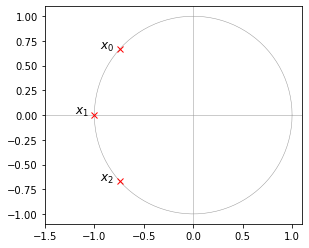

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.sqrt(5)/3
y = 2/3

t = np.linspace(0, np.pi*2, 100)
s = dict(color='#999', lw=0.5)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal')
ax.set_xlim(-1.5, 1.1)
ax.axhline(0, **s)
ax.axvline(0, **s)
ax.plot(np.cos(t), np.sin(t), **s)
ax.plot([-x, -1, -x], [y, 0, -y], 'rx')
kw = dict(fontsize='large')
ax.text(-x - 0.2, y, '$x_0$', **kw)
ax.text(-1 - 0.2, 0.01, '$x_1$', **kw)
ax.text(-x - 0.2, -y, '$x_2$', **kw)
plt.show()

To work out its frequency response we need to evaluate $|H(i\omega)|$ and $\angle H(i\omega)$.

As it happens, Wikipedia provides expressions for both:

In [18]:
def mag_wiki(w):
    return 15 / np.sqrt(w**6 + 6*w**4 + 45*w**2 + 225)

def arg_wiki(w):
    return np.arctan2((15*w - w**3), (15 - 6*w**2))

But we can also be lazy and let Python do the work

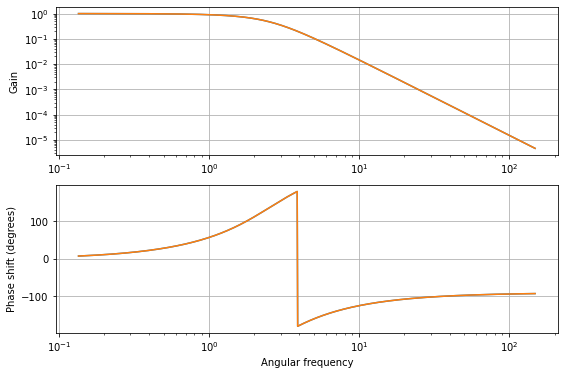

In [19]:
def mag(w):
    x = 0 + 1j * w
    return np.abs(15 / (x**3 + 6*x**2 + 15*x + 15))
    
def arg(w):
    x = 0 + 1j * w
    return -np.angle(15 / (x**3 + 6*x**2 + 15*x + 15))

axes = bode(mag, arg)
axes = bode(mag_wiki, arg_wiki, axes=axes)
plt.show()    

If we're not worried about performance, we can even write

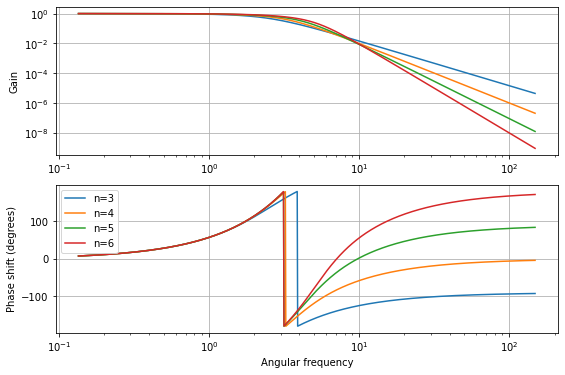

In [20]:
def bes(w, n):
    x = 0 + 1j * w
    a = revbes(n)
    b = np.array([x**(n - i) for i in range(1 + n)])
    return a[-1] / np.sum(a * b.T, axis=1)

def mag(w, n):
    return np.abs(bes(w, n))
    
def arg(w, n):
    return -np.angle(bes(w, n))

axes = bode(mag, arg, n=3)
axes = bode(mag, arg, n=4, axes=axes)
axes = bode(mag, arg, n=5, axes=axes)
axes = bode(mag, arg, n=6, axes=axes)
plt.show()    

To do the actual filtering, we can try using SciPy, although the API is a bit of a nightmare:

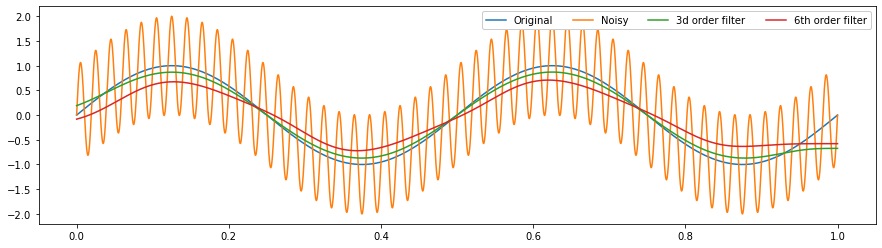

In [35]:
import scipy.signal

t = np.linspace(0, 1, 10001)
f = 1 / t[1]   # Sampling frequency, in Hz
w = 50         # Cut-off frequency, in Hz

def sin(x, f):
    """ Draw a sine wave with frequency f. """
    return np.sin(2 * np.pi * f * x)

def low_pass(data, w, f, n=3):
    """ Apply a Bessel low-pass filter with cut-off w (in Hz). """
    # For whatever reason, scipy's API wants you to specify
    # frequencies as fractions of half the sampling frequency.
    w = w / (f / 2)
    b, a = scipy.signal.bessel(n, w, btype='lowpass')
    return scipy.signal.filtfilt(b, a, data)

x = sin(t, 2)
y = x + sin(t, 50)

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot()
ax.plot(t, x, label='Original')
ax.plot(t, y, label='Noisy')
w = 6
ax.plot(t, low_pass(x, w, f, n=3), label='3d order filter')
ax.plot(t, low_pass(x, w, f, n=6), label='6th order filter')
ax.legend(ncol=4, framealpha=1)
plt.show()

Because we filtered quite close to the signal frequency, we see a lot of distortion, especially with the higher order filter (which is more aggresive).
This disappears when we raise the filter frequency:

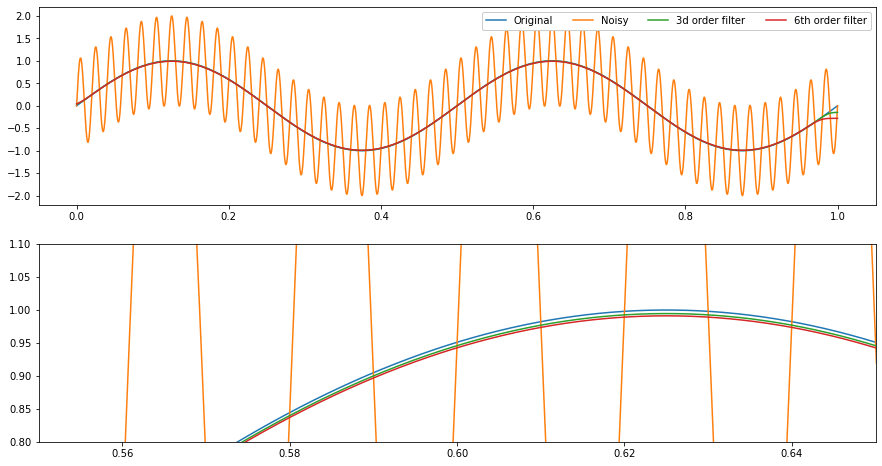

In [46]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(2, 1, 1)
ax.plot(t, x, label='Original')
ax.plot(t, y, label='Noisy')
w = 30
ax.plot(t, low_pass(x, w, f, n=3), label='3d order filter')
ax.plot(t, low_pass(x, w, f, n=6), label='6th order filter')
ax.legend(ncol=4, framealpha=1)
ax = fig.add_subplot(2, 1, 2)
ax.plot(t, x, label='Original')
ax.plot(t, y, label='Noisy')
ax.plot(t, low_pass(x, w, f, n=3), label='3d order filter')
ax.plot(t, low_pass(x, w, f, n=6), label='6th order filter')
ax.set_xlim(0.55, 0.65)
ax.set_ylim(0.8, 1.1)
plt.show()